In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import daslib



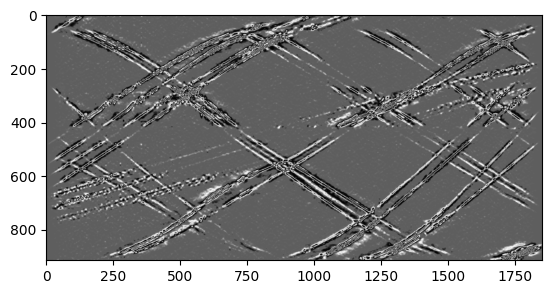

In [27]:
#cargamos la imagen im/tbw.png
img = cv2.imread('img/tbw.png',0)
#la convertimos a grayscale
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#y la representamos
plt.imshow(img, cmap='gray')

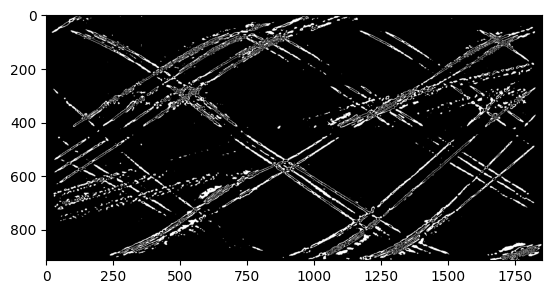

In [28]:
#apply otsu threshold
ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#invertimos el resultado
thresh = cv2.bitwise_not(thresh)
#representamos el resultado
plt.imshow(thresh, cmap='gray')


77


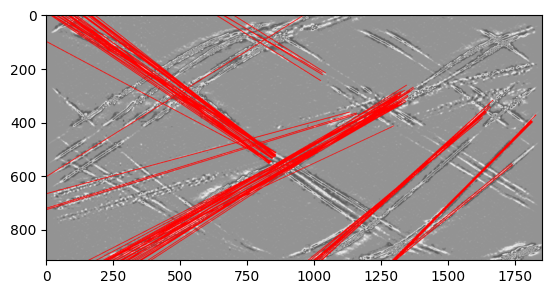

In [53]:
#copy img to imgl and convert to rgb
imgl = cv2.cvtColor(img.copy(), cv2.COLOR_GRAY2RGB)

img_filtrada = cv2.medianBlur(thresh, 5)
bordes = cv2.Canny(img_filtrada, 50, 150, apertureSize=3)

# Aplicar la transformada de Hough para detectar líneas
lineas = cv2.HoughLines(bordes, 1, np.pi/180, 150)

# Dibujar las líneas encontradas en la imagen original
if lineas is not None:
    for linea in lineas:
        rho, theta = linea[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(imgl, (x1, y1), (x2, y2), (255, 0, 0), 2)

#print the number of lines fount
print(len(lineas))
plt.imshow(imgl, cmap='gray')

77


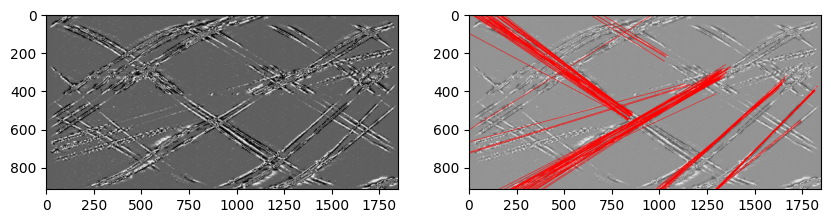

In [58]:
img = cv2.imread('img/tbw.png',0)

def detectar_lineas(img, bordes):
    lineas = cv2.HoughLines(bordes, 1, np.pi/180, 50)
    return lineas

def pintar_lineas(img, lineas):
    if lineas is not None:
        for linea in lineas:
            rho, theta = linea[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

def ventana_deslizante(img, tamano_ventana, paso):    
    img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    alto, ancho = img.shape

    for y in range(0, alto - tamano_ventana + 1, paso):
        for x in range(0, ancho - tamano_ventana + 1, paso):
            ventana = img[y:y + tamano_ventana, x:x + tamano_ventana]
            ventana_filtrada = cv2.medianBlur(ventana, 5)
            bordes = cv2.Canny(ventana_filtrada, 50, 150)

            detectar_lineas(img_color[y:y + tamano_ventana, x:x + tamano_ventana], bordes)

tamano_ventana = 32  # Tamaño de los cuadrados
paso = 32  # Distancia entre los cuadrados
#ventana_deslizante(img, tamano_ventana, paso)
#show image
#print the number of lines found
print(len(lineas))
#convertimos imagen en rgb
imgc = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
#dibujamos las lineas
pintar_lineas(imgc, lineas)

#show img and imgc on the same figure
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(imgc, cmap='gray')









